In [1]:
import json
import csv
import os
import openpyxl
import pandas as pd
import re
import csv 
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.simplefilter('ignore')

In [3]:
# Intentar abrir el archivo CSV con el códec 'iso-8859-1'
df = pd.read_csv('./Datasets/my2024-fuel-consumption-ratings.csv', encoding='iso-8859-1')

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 764 entries, 0 to 763
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Model year            764 non-null    int64  
 1   Make                  764 non-null    object 
 2   Model                 764 non-null    object 
 3   Vehicle class         764 non-null    object 
 4   Engine size (L)       764 non-null    float64
 5   Cylinders             764 non-null    int64  
 6   Transmission          764 non-null    object 
 7   Fuel type             764 non-null    object 
 8   City (L/100 km)       764 non-null    float64
 9   Highway (L/100 km)    764 non-null    float64
 10  Combined (L/100 km)   764 non-null    float64
 11  Combined (mpg)        764 non-null    int64  
 12  CO2 emissions (g/km)  764 non-null    int64  
 13  CO2 rating            764 non-null    int64  
 14  Smog rating           764 non-null    int64  
dtypes: float64(4), int64(6)

In [5]:
print(df.head())

   Model year   Make              Model                    Vehicle class  \
0        2024  Acura     Integra A-SPEC                        Full-size   
1        2024  Acura     Integra A-SPEC                        Full-size   
2        2024  Acura     Integra Type S                        Full-size   
3        2024  Acura         MDX SH-AWD     Sport utility vehicle: Small   
4        2024  Acura  MDX SH-AWD Type S  Sport utility vehicle: Standard   

   Engine size (L)  Cylinders Transmission Fuel type  City (L/100 km)  \
0              1.5          4          AV7         Z              8.1   
1              1.5          4           M6         Z              8.9   
2              2.0          4           M6         Z             11.1   
3              3.5          6         AS10         Z             12.6   
4              3.0          6         AS10         Z             13.8   

   Highway (L/100 km)  Combined (L/100 km)  Combined (mpg)  \
0                 6.5                  7.4

In [6]:
df.columns

Index(['Model year', 'Make', 'Model', 'Vehicle class', 'Engine size (L)',
       'Cylinders', 'Transmission', 'Fuel type', 'City (L/100 km)',
       'Highway (L/100 km)', 'Combined (L/100 km)', 'Combined (mpg)',
       'CO2 emissions (g/km)', 'CO2 rating', 'Smog rating'],
      dtype='object')

In [27]:
# Eliminar la columna SR_Flag
df = df.drop(columns=['Engine size (L)',
       'Cylinders', 'Transmission', 'Fuel type', 'City (L/100 km)',
       'Highway (L/100 km)',])

#### Comparación de Consumo de Combustible por Clase de Vehículo

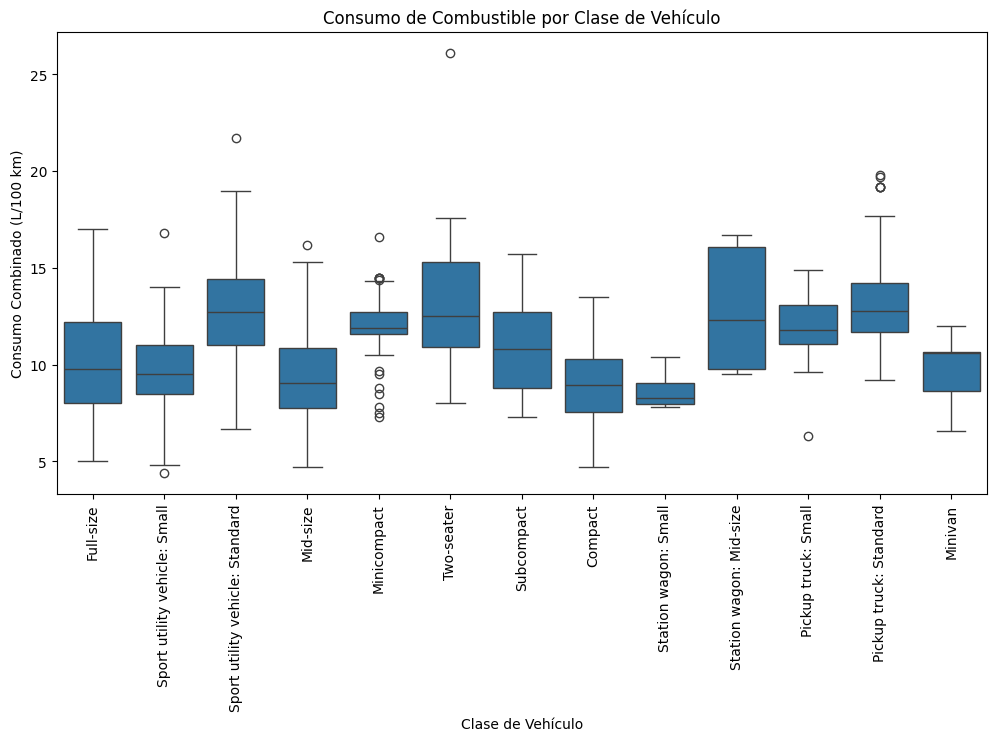

In [7]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Vehicle class', y='Combined (L/100 km)', data=df)
plt.title('Consumo de Combustible por Clase de Vehículo')
plt.xlabel('Clase de Vehículo')
plt.ylabel('Consumo Combinado (L/100 km)')
plt.xticks(rotation=90)
plt.show()

Los vehículos minicompactos y compactos tienden a ser más eficientes en términos de consumo de combustible.\
Los vehículos de tamaño completo y camionetas (pickup trucks) tienden a consumir más combustible. \
Los vehículos utilitarios deportivos (SUVs) tienen una variabilidad significativa en su consumo, con los SUVs estándar consumiendo más que los SUVs pequeños. \
Los station wagons de tamaño mediano tienen los consumos más altos, lo que puede influir en decisiones sobre qué tipos de vehículos considerar para una flota más eficiente.

#### Relación entre Consumo de Combustible y Emisiones de CO2

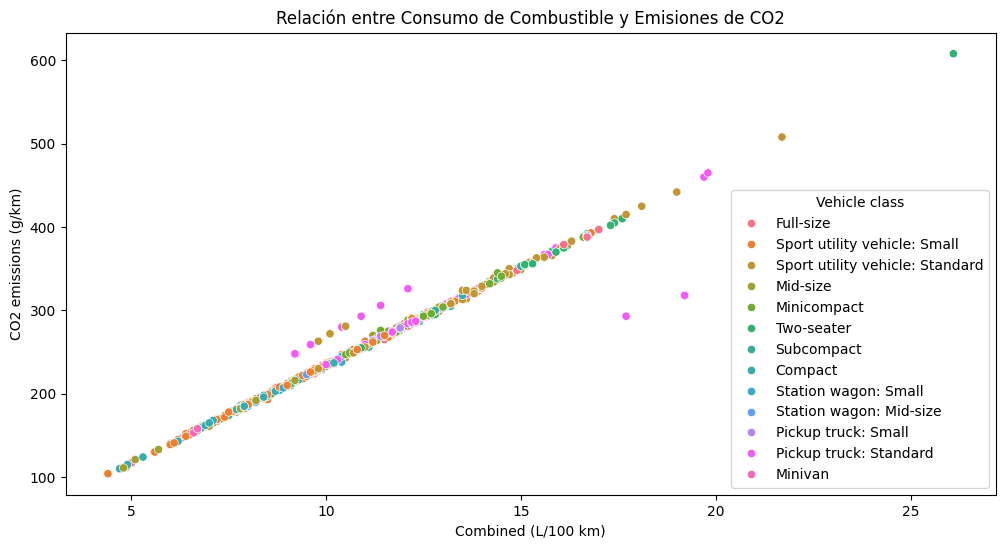

In [8]:

plt.figure(figsize=(12, 6))
sns.scatterplot(x='Combined (L/100 km)', y='CO2 emissions (g/km)', hue='Vehicle class', data=df)
plt.title('Relación entre Consumo de Combustible y Emisiones de CO2')
plt.show()

Relación Consumo-Emisiones: La relación lineal positiva entre el consumo de combustible y las emisiones de CO2 es clara y consistente, indicando que cualquier reducción en el consumo de combustible (e.g., mediante la implementación de vehículos eléctricos) probablemente resultará en una reducción proporcional de las emisiones de CO2. 

Eficiencia por Clase de Vehículo: Al comparar las clases de vehículos, es evidente que los vehículos más pequeños y eficientes (minicompactos, subcompactos) tienden a tener menores emisiones de CO2 en comparación con los vehículos más grandes (pickup trucks, station wagons). 

Potencial de Reducción de Emisiones: Este análisis puede ayudar a la empresa de transporte a identificar qué clases de vehículos serían las más efectivas para sustituir con alternativas eléctricas o híbridas con el fin de reducir las emisiones de CO2 y mejorar la eficiencia del combustible.

#### Clasificación de Eficiencia y Contaminación por Clase de Vehículo

<Figure size 1200x600 with 0 Axes>

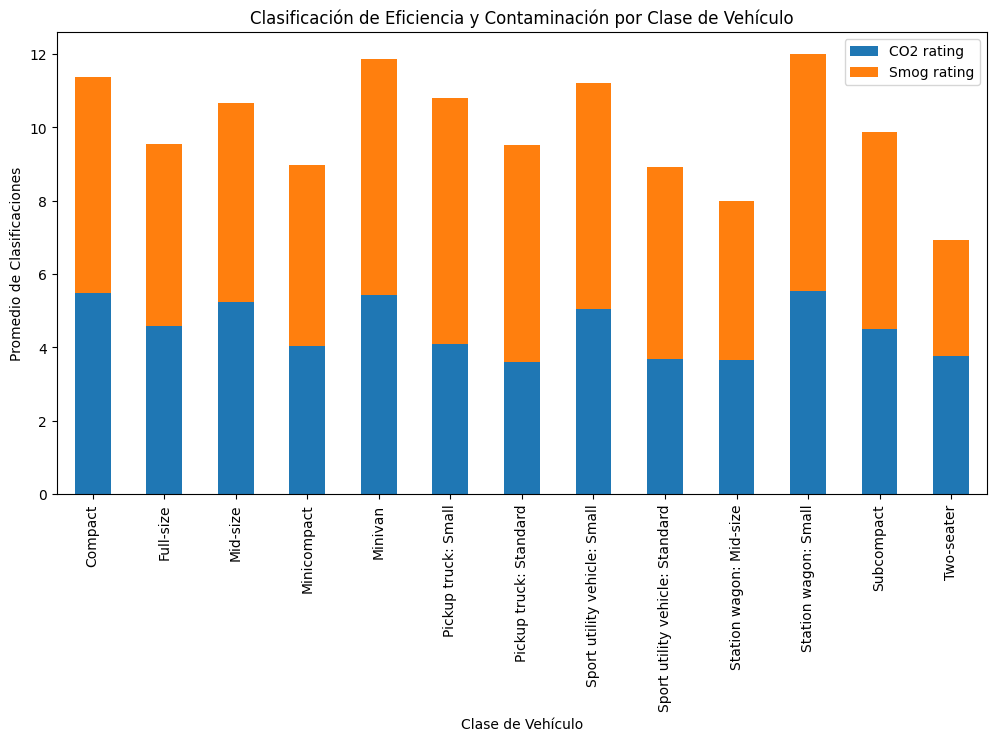

In [9]:
plt.figure(figsize=(12, 6))
df_grouped = df.groupby('Vehicle class')[['CO2 rating', 'Smog rating']].mean()
df_grouped.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Clasificación de Eficiencia y Contaminación por Clase de Vehículo')
plt.ylabel('Promedio de Clasificaciones')
plt.xlabel('Clase de Vehículo')
plt.show()

Las clasificaciones de CO2 (barras azules) indican la eficiencia del vehículo en términos de emisiones de dióxido de carbono. Una clasificación más alta indica mejores emisiones de CO2. \
Las clasificaciones de smog (barras naranjas) reflejan el impacto del vehículo en la contaminación del aire. Una clasificación más alta indica menor impacto de smog.

Compact y Two-seater tienen clasificaciones combinadas más altas, lo que sugiere que estos tipos de vehículos tienden a ser más eficientes y menos contaminantes en general. \
Sport utility vehicle: Small y Station wagon: Small también tienen clasificaciones relativamente altas, pero con un mayor componente de smog en comparación con CO2. \
Minivan y Pickup truck: Standard muestran clasificaciones combinadas más bajas, lo que sugiere que estos vehículos tienden a ser menos eficientes y más contaminantes.

Los vehículos compactos y de dos asientos parecen ser los más eficientes y menos contaminantes en promedio.
Las camionetas y minivans son las menos eficientes y más contaminantes. \
Los SUVs pequeños y las camionetas pequeñas tienen una combinación moderada de eficiencia y contaminación, pero con una mayor contribución de smog.

Este análisis puede ser útil para la empresa de transporte en varias formas:

Selección de Vehículos: La empresa puede considerar invertir en clases de vehículos que tengan clasificaciones más altas de CO2 y smog para minimizar el impacto ambiental. \
Estrategia de Flota: Implementar una flota de vehículos más eficientes y menos contaminantes puede alinearse con su objetivo de un futuro menos contaminado. \
Análisis de Impacto: Usar esta información para realizar un análisis más profundo sobre cómo diferentes clases de vehículos impactan la calidad del aire y la contaminación sonora.